<a href="https://colab.research.google.com/github/jiruneko/StudyCo_PyTorch/blob/main/StudyCo_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
x = torch.rand(2, 2, requires_grad=True)
y = x**2
z = y.sum()
z.backward()
print(x)
print(x.grad)

tensor([[0.3655, 0.8517],
        [0.2831, 0.8832]], requires_grad=True)
tensor([[0.7310, 1.7035],
        [0.5661, 1.7664]])


11490434/11490434 [==============================] - 0s 0us/step


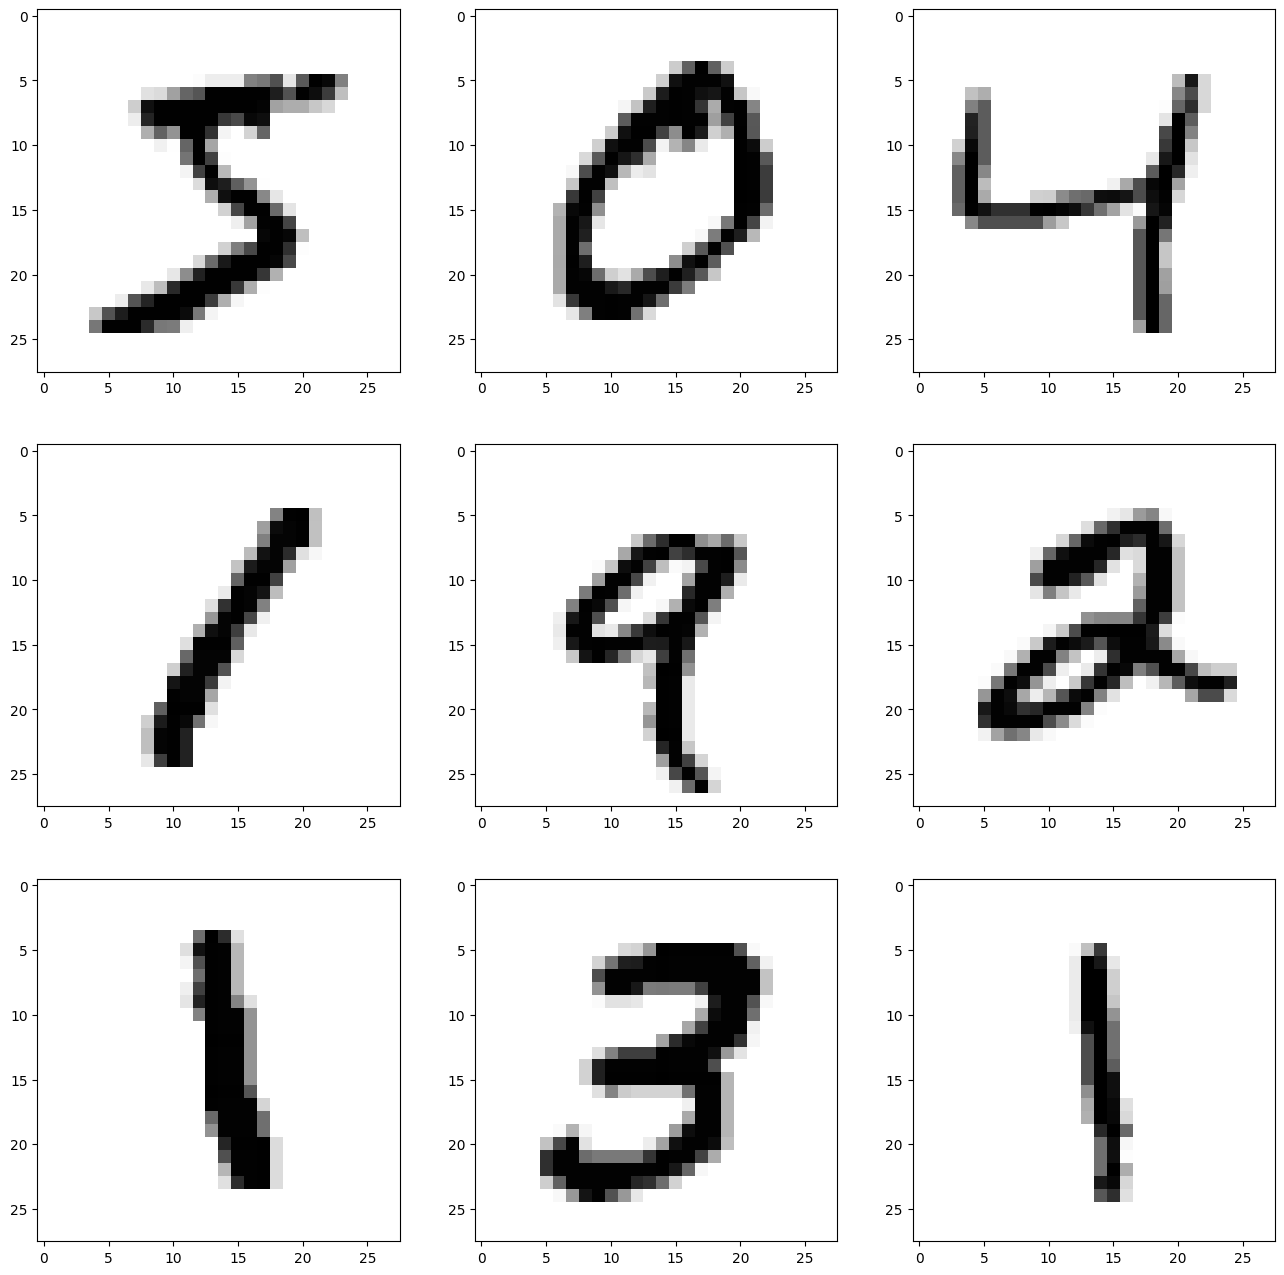

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# MNIST データセットの読み込み
from keras.datasets.mnist import load_data

# データセットの読み込み
(mnist_x, mnist_y), (test_x, test_y) = load_data()

# 図形オブジェクトの作成
fig = plt.figure(figsize=(16, 16))

# 3行3列のサブプロットを作成
for i in range(9):
  ax = fig.add_subplot(3, 3, i+1)

  # 画像の表示
  ax.imshow(np.array(mnist_x[i, :].reshape(28, 28)), cmap='binary')

# 図形の表示
plt.show()

In [ ]:
# from torch.optim import Adam

# # forward
# model = MyModel()
# out = model(x)
# loss = criterion(out, target)

# # backword
# loss.backward()

# # step
# optimizer = Adam(MyModel.parameters())
# optimizer.step()

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam

In [ ]:
device = 'cpu'

In [ ]:
mnist_x, mnist_y = fetch_openml('mnist_784', version=1, data_home='.', return_X_y=True)

mnist_x /= 255

mnist_y = mnist_y.astype(np.int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-7-baf3f6c0d4ba>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mnist_y = mnist

In [ ]:
print(mnist_x.shape)
print(mnist_y.shape)

(70000, 784)
(70000,)


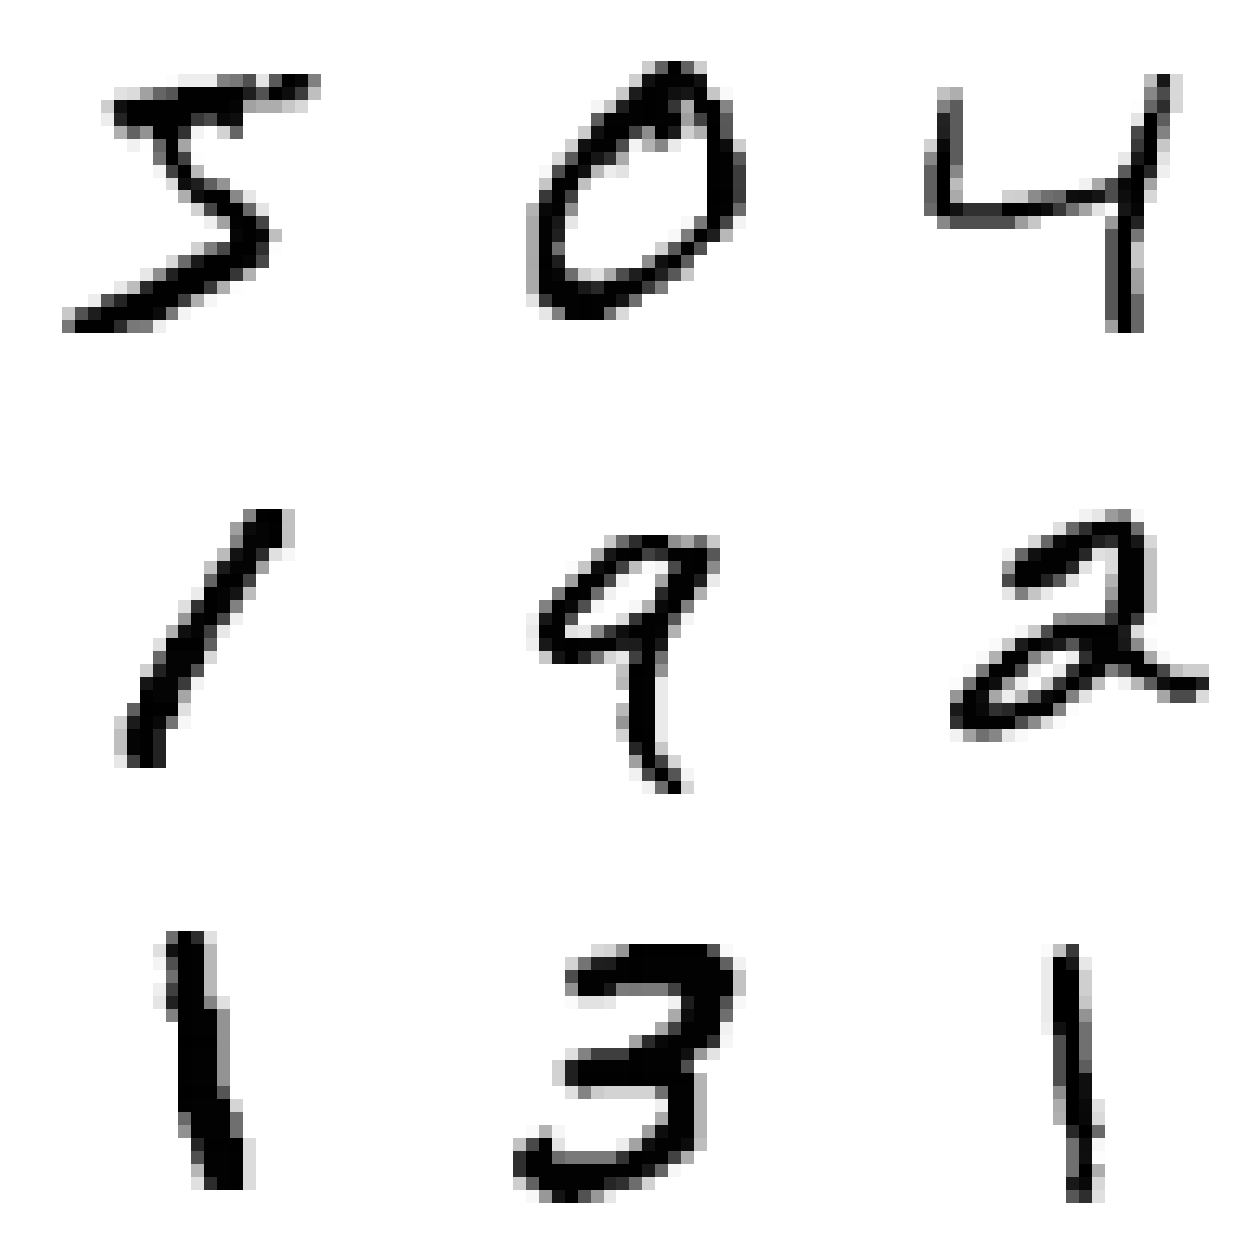

In [ ]:
fig = plt.figure(figsize=(16, 16))

for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    # DataFrameやSeriesからデータを取得する際には .iloc を使用
    ax.imshow(np.array(mnist_x.iloc[i].values.reshape(28, 28)), cmap='binary')
    ax.axis('off')  # 軸の表示をオフにする

# plt.show()

In [ ]:
class MNISTDataset(Dataset):
  def __init__(self, mnist_x, mnist_y):
    self.x = mnist_x
    self.y = mnist_y.reshape(-1, 1)

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, index):
    # ここに何らかの処理を書く場合が多い
      return {
          'x': torch.FloatTensor(self.x[index]),
          'y': torch.LongTensor(self,y[index])
      }

In [ ]:
mnist_x_train, mnist_x_valid, mnist_y_train, mnist_y_valid = train_test_split(mnist_x, mnist_y, test_size=0.3)
mnist_x_valid, mnist_x_test, mnist_y_valid, mnist_y_test = train_test_split(mnist_x_valid, mnist_y_valid, test_size=0.3)

dataset_train = MNISTDataset(mnist_x_train, mnist_y_train)
dataset_valid = MNISTDataset(mnist_x_valid, mnist_y_valid)

dataloader_train = DataLoader(dataset_train, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
dataloader_valid = DataLoader(dataset_valid, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)

AttributeError: 'Series' object has no attribute 'reshape'